**1.Import and Explore the Dataset**


In [1]:
import pandas as pd
df = pd.read_csv('mandi.csv')

In [2]:
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,East Godavari,Jaggampet,Paddy(Dhan)(Common),Common,FAQ,06/04/2025,2300.00,2320.00,2320.00
1,Assam,Barpeta,Barpeta Road,Bottle gourd,Bottle Gourd,Local,06/04/2025,1133.39,1200.06,1200.06
2,Assam,Barpeta,Barpeta Road,Cabbage,Cabbage,Local,06/04/2025,300.00,400.00,400.00
3,Assam,Cachar,Sonabarighat,Cabbage,Cabbage,Local,06/04/2025,1500.00,1600.00,1500.00
4,Assam,Golaghat,Golaghat,Tomato,Tomato,Local,06/04/2025,1000.00,1300.00,1200.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              7030 non-null   object 
 1   District           7030 non-null   object 
 2   Market             7030 non-null   object 
 3   Commodity          7030 non-null   object 
 4   Variety            7030 non-null   object 
 5   Grade              7030 non-null   object 
 6   Arrival_Date       7030 non-null   object 
 7   Min_x0020_Price    7030 non-null   float64
 8   Max_x0020_Price    7030 non-null   float64
 9   Modal_x0020_Price  7030 non-null   float64
dtypes: float64(3), object(7)
memory usage: 549.3+ KB


**2.Clean and Preprocess the Data**

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,East Godavari,Jaggampet,Paddy(Dhan)(Common),Common,FAQ,06/04/2025,2300.00,2320.00,2320.00
1,Assam,Barpeta,Barpeta Road,Bottle gourd,Bottle Gourd,Local,06/04/2025,1133.39,1200.06,1200.06
2,Assam,Barpeta,Barpeta Road,Cabbage,Cabbage,Local,06/04/2025,300.00,400.00,400.00
3,Assam,Cachar,Sonabarighat,Cabbage,Cabbage,Local,06/04/2025,1500.00,1600.00,1500.00
4,Assam,Golaghat,Golaghat,Tomato,Tomato,Local,06/04/2025,1000.00,1300.00,1200.00


In [6]:
print(df.columns)

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min_x0020_Price', 'Max_x0020_Price',
       'Modal_x0020_Price'],
      dtype='object')


In [7]:
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d/%m/%Y')
#Arrival_Date to datetime

In [8]:
df.columns = df.columns.str.replace('_x0020_', '_').str.strip()
#renaming columns 

In [9]:
df.isnull().sum()
#checks nulls

State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min_Price       0
Max_Price       0
Modal_Price     0
dtype: int64

In [10]:
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price
0,Andhra Pradesh,East Godavari,Jaggampet,Paddy(Dhan)(Common),Common,FAQ,2025-04-06,2300.00,2320.00,2320.00
1,Assam,Barpeta,Barpeta Road,Bottle gourd,Bottle Gourd,Local,2025-04-06,1133.39,1200.06,1200.06
2,Assam,Barpeta,Barpeta Road,Cabbage,Cabbage,Local,2025-04-06,300.00,400.00,400.00
3,Assam,Cachar,Sonabarighat,Cabbage,Cabbage,Local,2025-04-06,1500.00,1600.00,1500.00
4,Assam,Golaghat,Golaghat,Tomato,Tomato,Local,2025-04-06,1000.00,1300.00,1200.00


**3.Visualising Data**

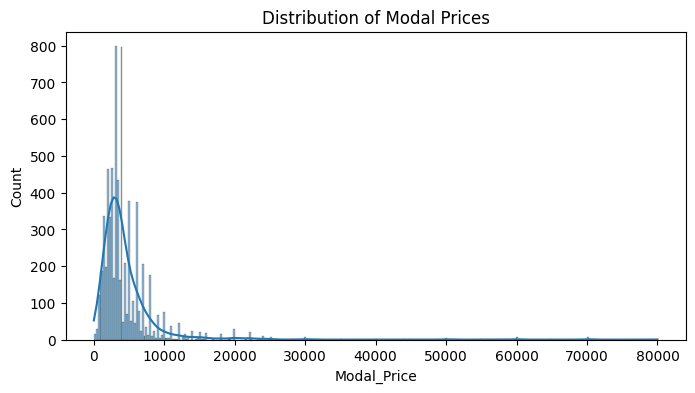

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.histplot(df['Modal_Price'], kde=True)
plt.title('Distribution of Modal Prices')
plt.show()

In [12]:
data=df.drop(['State','District','Market','Commodity','Variety','Grade','Arrival_Date'],axis=1)

In [13]:
data.cov()

,Min_Price,Max_Price,Modal_Price
Min_Price,1.912518e+07,2.067073e+07,2.066375e+07
Max_Price,2.067073e+07,2.335594e+07,2.318596e+07
Modal_Price,2.066375e+07,2.318596e+07,2.315018e+07


In [14]:
data.corr()

,Min_Price,Max_Price,Modal_Price
Min_Price,1.000000,0.978035,0.982040
Max_Price,0.978035,1.000000,0.997124
Modal_Price,0.982040,0.997124,1.000000


<Axes: >

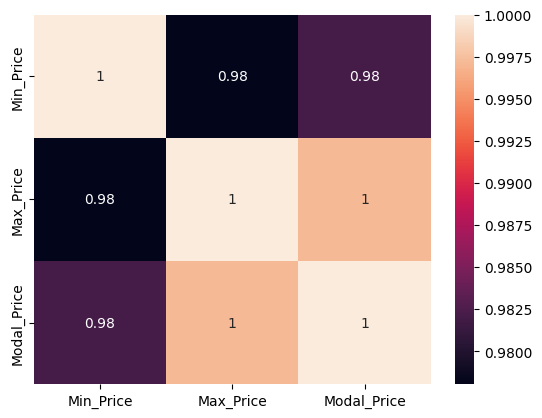

In [15]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

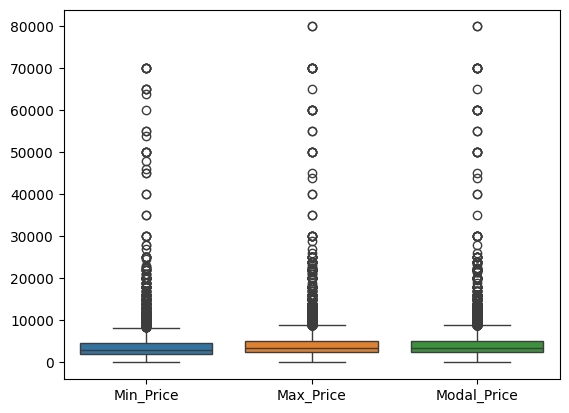

In [16]:
sns.boxplot(df)

In [17]:
print(df.Modal_Price)

0       2320.00
1       1200.06
2        400.00
3       1500.00
4       1200.00
         ...   
7025    1400.00
7026    3550.00
7027    1050.00
7028    4400.00
7029    3500.00
Name: Modal_Price, Length: 7030, dtype: float64


In [24]:
plt.figure(figsize=(10, 4))
df.groupby('state')['Modal_Price'].mean().plot()
plt.title('Average Modal Price Over Time')
plt.ylabel('Price')
plt.show()

KeyError: 'state'

<Figure size 1000x400 with 0 Axes>

**4.EDA**

In [19]:
df.describe()

,Arrival_Date,Min_Price,Max_Price,Modal_Price
count,7030,7030.000000,7030.000000,7030.000000
mean,2025-04-06 00:00:00.000000256,3957.841385,4502.544724,4448.361723
min,2025-04-06 00:00:00,1.000000,4.000000,3.000000
25%,2025-04-06 00:00:00,2000.000000,2400.000000,2400.000000
50%,2025-04-06 00:00:00,3000.000000,3500.000000,3500.000000
75%,2025-04-06 00:00:00,4500.000000,5000.000000,5000.000000
max,2025-04-06 00:00:00,70000.000000,80000.000000,80000.000000
std,NaN,4373.234105,4832.798488,4811.463553


In [20]:
df.groupby('Commodity')['Modal_Price'].mean().sort_values(ascending=False).head(10)

Commodity
Kakada                68000.000000
Jasmine               57500.000000
Tube Flower           55625.000000
Fish                  25000.000000
Cummin Seed(Jeera)    20000.000000
Marigold(Calcutta)    17880.952381
Pomegranate           17737.121212
Rose(Local)           16347.826087
Chili Red             16125.000000
Mustard Oil           14915.000000
Name: Modal_Price, dtype: float64

**5.Saving Cleaned Data**

In [21]:
df.to_csv('mandi_cleaned.csv', index=False)